In [1]:
from f_measurents import *

In [2]:
# Config
import config
landmarks = config.landmarks
top_to_bottom_angle_ref = config.top_to_bottom_angle_ref
top_to_bottom_angle_max_deviation = config.top_to_bottom_angle_max_deviation
left_to_right_angle_ref = config.left_to_right_angle_ref
left_to_right_angle_max_deviation_perc = config.left_to_right_angle_max_deviation_perc
area_ratio_right_to_left_max_deviation_perc = config.area_ratio_right_to_left_max_deviation_perc
area_ratio_right_to_left_ref = config.area_ratio_right_to_left_ref
interactive_plot = False

In [3]:
image_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/Image_Processing/gradio_app/v1/images/good/2.jpeg'
image = cv2.imread(image_path)

In [4]:
if interactive_plot == True:
    image = image_bgr_to_rgb(image)
    result, mesh_points = face_mesh_points(image)
    fig = mesh_points_interactive_plot_with_image(mesh_points, image_path)
    fig.show()
    fig = mesh_points_interactive_plot(mesh_points)
    fig.show()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


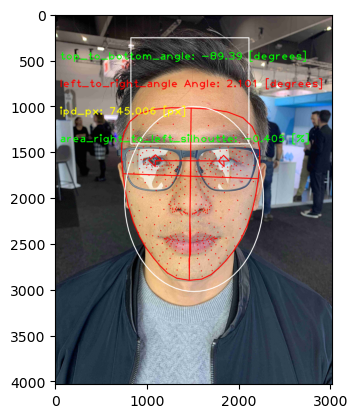

In [5]:
# Read and transform colourspace image
image = cv2.imread(image_path)
image = image_bgr_to_rgb(image)
# Getting face lanmarks + iris position
result, mesh_points = face_mesh_points(image)
iris_position, iris_radius = find_iris_location(mesh_points,landmarks)
# Measuring properties
ipd_px = get_ipd_px(iris_position)
width_face_px, height_face_px = get_face_dimensions_px(mesh_points, landmarks)
top_to_bottom_angle = get_top_to_bottom_angle(mesh_points, landmarks)
left_to_right_angle = get_left_to_right_angle(mesh_points, landmarks)
area_px_left_silhoutte = area_px_left_silhoutte(mesh_points, landmarks)
area_px_right_silhoutte = area_px_right_silhoutte(mesh_points, landmarks)
area_right_to_left_silhoutte = (1 - (area_px_right_silhoutte/area_px_left_silhoutte))*100
# Printing objects
image = print_face_mesh_image(image, result)
image = print_iris_location(image, mesh_points, landmarks)
image = print_center_iris(image, iris_position)
image = print_line_left_to_right_iris(image, iris_position)
image = print_line_top_to_bottom(image, mesh_points, landmarks)
image = print_line_left_to_right(image, mesh_points, landmarks)
image = print_silhouette(image, mesh_points, landmarks)
image = print_rectangle_card_area(image, mesh_points, landmarks)
image = print_right_silhouette(image, mesh_points, landmarks)
image = print_left_silhouette(image, mesh_points, landmarks)
image = print_face_oval(image)
# Screenprinting data and checks
image = screenprint_top_to_bottom_angle(image, top_to_bottom_angle, top_to_bottom_angle_ref, top_to_bottom_angle_max_deviation)
image = screenprint_left_to_right_angle(image, left_to_right_angle, left_to_right_angle_ref, left_to_right_angle_max_deviation_perc)
image = screenprint_area_right_to_left_silhoutte(image, area_right_to_left_silhoutte, area_ratio_right_to_left_ref, area_ratio_right_to_left_max_deviation_perc)
image = screenprint_ipd_px(image, ipd_px)
# 
plt.imshow(image)

In [6]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

In [ ]:
top_to_bottom_angle_ref = config.top_to_bottom_angle_ref
top_to_bottom_angle_max_deviation = config.top_to_bottom_angle_max_deviation
left_to_right_angle_ref = config.left_to_right_angle_ref
left_to_right_angle_max_deviation_perc = config.left_to_right_angle_max_deviation_perc
area_ratio_right_to_left_max_deviation_perc = config.area_ratio_right_to_left_max_deviation_perc
area_ratio_right_to_left_ref = config.area_ratio_right_to_left_ref
# -------------------
# top_to_bottom_angle
top_to_bottom_angle_ref = -90
top_to_bottom_angle_max_deviation = 1
# 
if abs(top_to_bottom_angle - top_to_bottom_angle_ref) < top_to_bottom_angle_max_deviation:
    colour_text_top_to_bottom_angle = colour_text_valid
else:
    colour_text_top_to_bottom_angle = colour_text_invalid
image = cv2.putText(image, f'top_to_bottom_angle: {str(round(top_to_bottom_angle,3))} [degrees]', (x_position_0,500), cv2.FONT_HERSHEY_PLAIN, font_scale, colour_text_top_to_bottom_angle, font_thickness)
# -------------------
# left_to_right_angle
left_to_right_angle_ref = 0
left_to_right_angle_max_deviation_perc = 1
if abs(left_to_right_angle - left_to_right_angle_ref) < left_to_right_angle_max_deviation_perc:
    colour_text_left_to_right_angle = colour_text_valid
else:
    colour_text_left_to_right_angle = colour_text_invalid
image = cv2.putText(image, f'left_to_right_angle Angle: {str(round(left_to_right_angle,3))} [degrees]', (x_position_0,800), cv2.FONT_HERSHEY_PLAIN, font_scale, colour_text_left_to_right_angle, font_thickness)
# -------------------
# area_right_to_left_silhoutte
area_ratio_right_to_left_max_deviation_perc = 3
area_ratio_right_to_left_ref = 0
if abs(area_right_to_left_silhoutte - area_ratio_right_to_left_ref) < area_ratio_right_to_left_max_deviation_perc:
    colour_text_area_right_to_left_silhoutte = colour_text_valid
else:
    colour_text_area_right_to_left_silhoutte = colour_text_invalid
image = cv2.putText(image, f'area_right_to_left_silhoutte: {str(round(area_right_to_left_silhoutte,3))} [%]', (x_position_0,1400), cv2.FONT_HERSHEY_PLAIN, font_scale,colour_text_area_right_to_left_silhoutte, font_thickness)
# -------------------
# IPD
image = cv2.putText(image, f'ipd_px: {str(round(ipd_px,3))} [px]', (50,1100), cv2.FONT_HERSHEY_PLAIN, font_scale, colour_text, font_thickness)
plt.imshow(image)

In [ ]:
plt.imshow(image)
cv2.imwrite('output/processing_image.jpg', image_rgb_to_bgr(image)) 